In [35]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [37]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [38]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

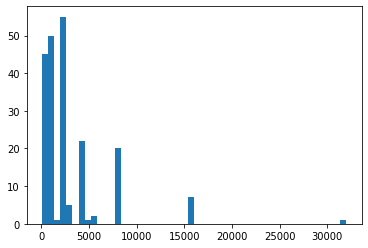

In [39]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

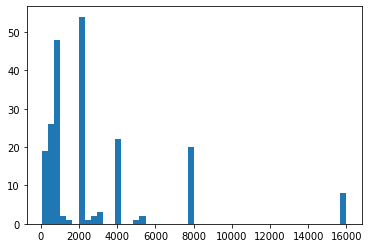

In [40]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

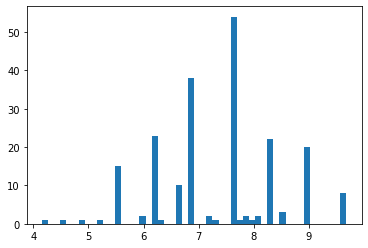

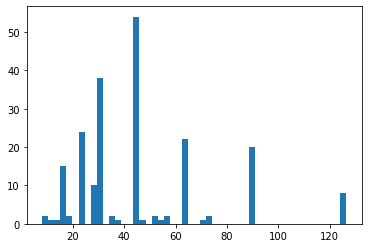

In [41]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [42]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [43]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [44]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

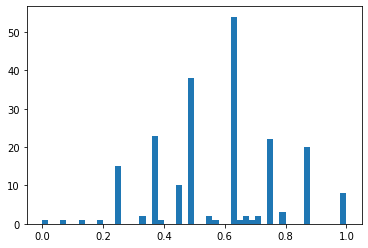

In [45]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

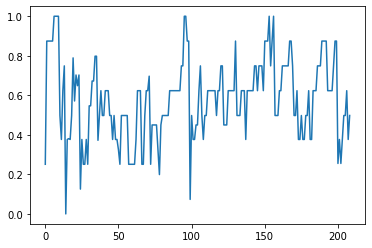

In [46]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [47]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [48]:
# Конвертируем в одномерный массив
data = data.flatten()

In [49]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

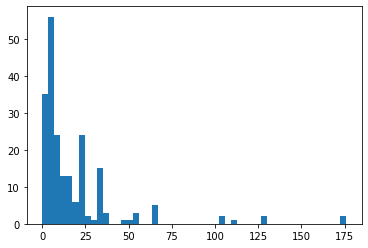

In [50]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

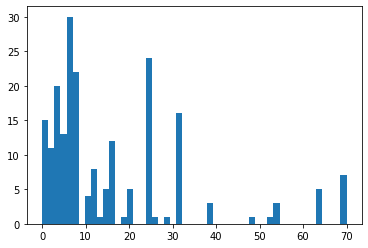

In [51]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

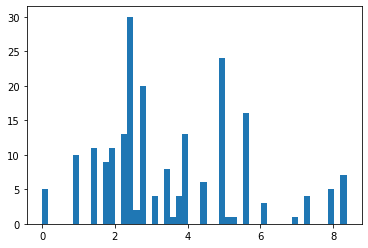

In [52]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [53]:
data = data ** 0.5

In [54]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [55]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

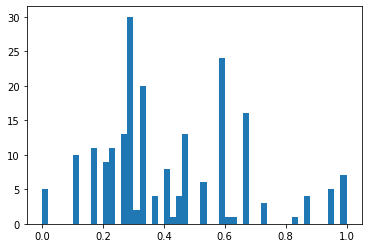

In [56]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

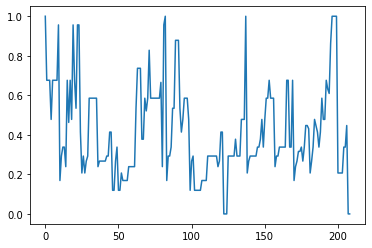

In [57]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [58]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [59]:
# Конвертируем в одномерный массив
data = data.flatten()

In [60]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

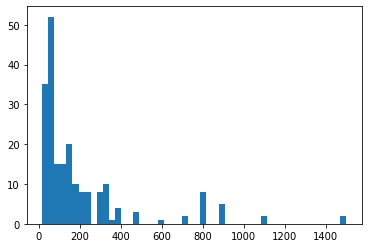

In [61]:
# Обрабаывает данные из 2 толбца

# Загружаем данные 
data = raw_dataset[2]

# Аналазируем распределение
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

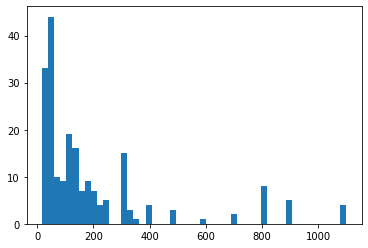

In [62]:
# Наблюдаем проблему № 4 . Выброс в районе 1500
# Применяем отсечение 
data = numpy.clip(data , 0 , 1100)

# Результат
matplotlib.pyplot.hist(data , bins = 50)
matplotlib.pyplot.show()

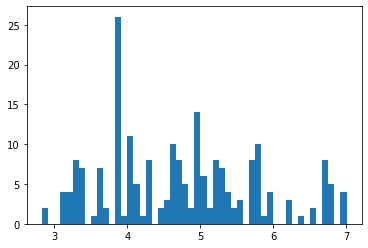

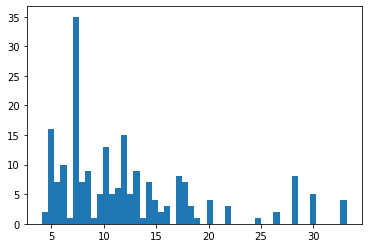

In [63]:
# Наблюдаем проблему № 3 . Неравномерное распределение
# Пробуем применить к данныам логарифм и извлечение корня 

matplotlib.pyplot.hist(numpy.log(data) , bins = 50 )
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5 , bins = 50 )
matplotlib.pyplot.show()

In [64]:
# Логарифм дает более равномерное распределение . Применяем его к данным
data = numpy.log(data)

In [65]:
# Теперь данные имеют область значений
print(numpy.min(data))
print(numpy.max(data))

2.833213344056216
7.003065458786462


In [66]:
# Приводим значения к интервалу (0.1)
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

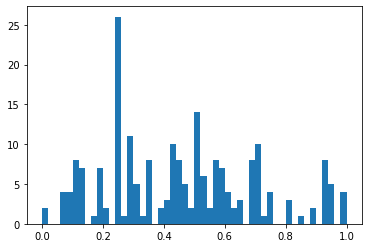

In [67]:
# Результат 
matplotlib.pyplot.hist(data , bins = 50 )
matplotlib.pyplot.show()

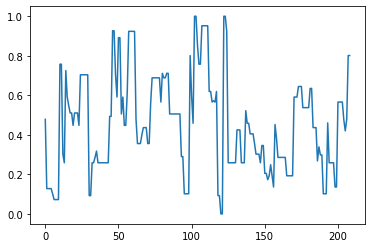

In [68]:
# Cами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [69]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [70]:
# Конвертируем в одномерный массив
data = data.flatten()

In [71]:
# Сохраняем в итоговом наборе данных
dataset['2столбец'] = data

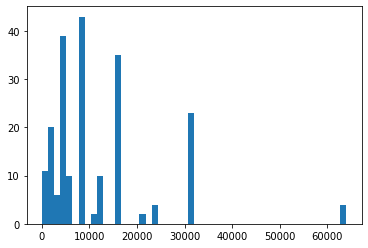

In [72]:
# Обрабаывает данные из 4 толбца
data = raw_dataset[4]

matplotlib.pyplot.hist(data , bins = 50 )
matplotlib.pyplot.show()

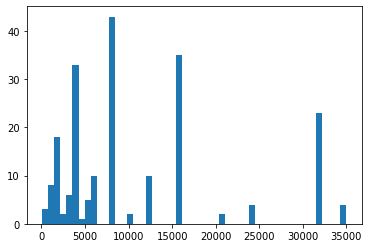

In [73]:
# Наблюдаем проблему № 4 . Выброс в районе 65000 . Отсекаем 
data = numpy.clip(data , 0 , 35000)

matplotlib.pyplot.hist(data, bins =50)
matplotlib.pyplot.show()

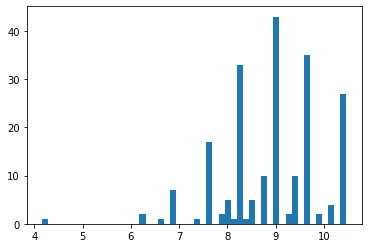

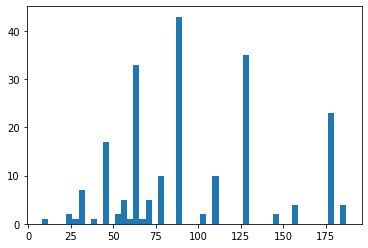

In [74]:
# Даннные распределены неравномерно . Применяем корень и логарифм 
matplotlib.pyplot.hist(numpy.log(data) , bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5 , bins = 50)
matplotlib.pyplot.show()

In [75]:
# Применяем логарифм к данным 
data = numpy.log(data)

In [76]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
10.46310334047155


In [77]:
# Приведем данные к интервалу (0,1)
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

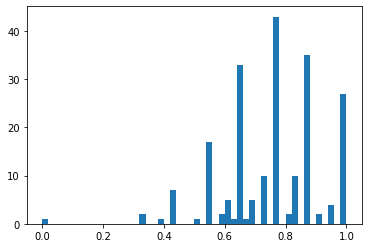

In [78]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

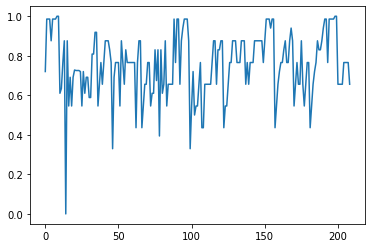

In [79]:
# Cами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [80]:
print(data.ndim)

2


In [81]:
# Конвертируем в одномерный массив
data = data.flatten()

In [82]:
# Сохраняем в итоговом наборе данных
dataset['4 столбец'] = data

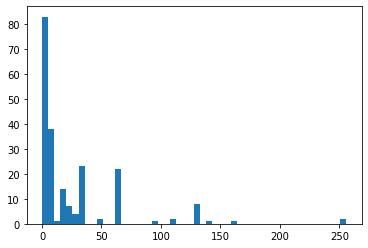

In [83]:
# Обрабаывает данные из 5 столбца 
data = raw_dataset[5]

matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

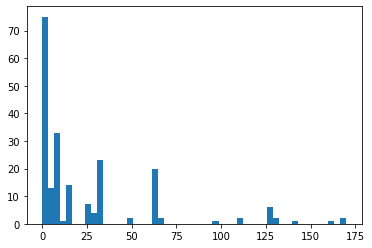

In [84]:
# Проблема 4 . Выброс в районе 250 . Обрезаем 
data = numpy.clip(data, 0, 170)

matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

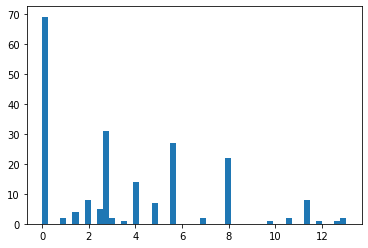

In [85]:
# Так же проблема № 3 неравномерное распределение , применяем корень т.к. есть нули 

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [86]:
data = data ** 0.5 

In [87]:
print(numpy.min(data))
print(numpy.max(data))

0.0
13.038404810405298


In [88]:
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

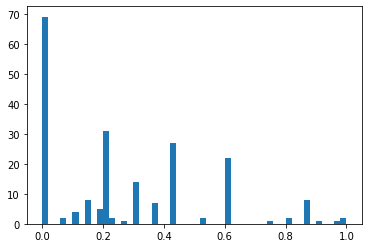

In [89]:
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

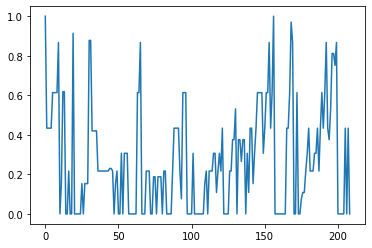

In [90]:
# Данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [91]:
print(data.ndim)

2


In [92]:
data = data.flatten()

In [93]:
dataset['5 столбец'] = data

In [94]:
# Обработка данных в столбце №6

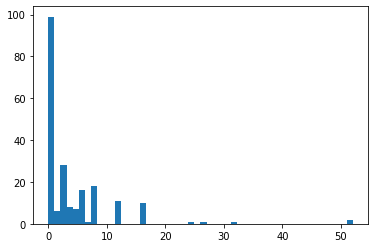

In [95]:
data = raw_dataset[6]

matplotlib.pyplot.hist(data , bins=50)
matplotlib.pyplot.show()

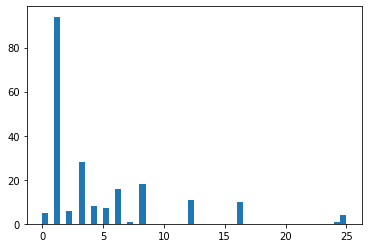

In [96]:
# Проблема №4 выброс в районе 30,55

data = numpy.clip(data , 0 , 25)
matplotlib.pyplot.hist(data,bins = 50)
matplotlib.pyplot.show()

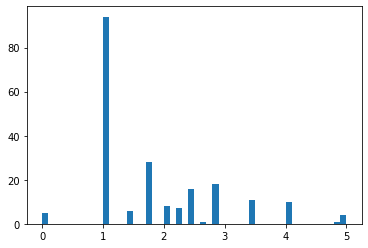

In [97]:
matplotlib.pyplot.hist(data ** 0.5 , bins = 50)
matplotlib.pyplot.show()

In [98]:
data = data ** 0.5

In [99]:
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

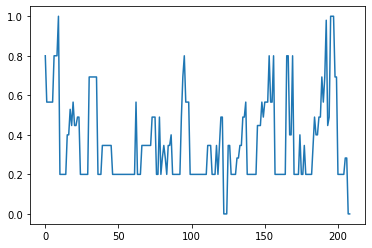

In [100]:
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [101]:
print(data.ndim)

2


In [102]:
data = data.flatten()

In [103]:
dataset['6 столбец'] = data

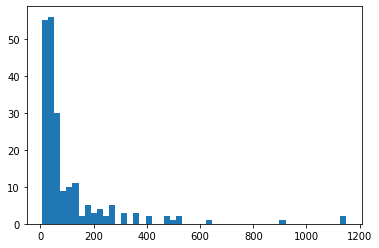

In [104]:
# Обработка данных в столбце №8
data = raw_dataset[8]

matplotlib.pyplot.hist(data , bins = 50 )
matplotlib.pyplot.show()

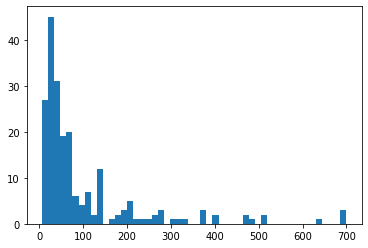

In [105]:
# Выброс на отрезке (900,1200) отсекаем 
data = numpy.clip(data,0,700)

matplotlib.pyplot.hist(data , bins = 50 )
matplotlib.pyplot.show()

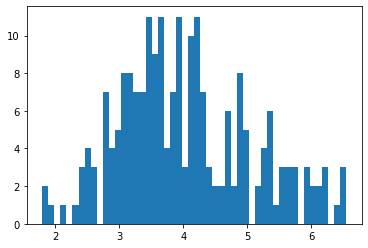

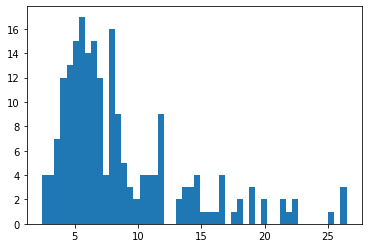

In [106]:
matplotlib.pyplot.hist(numpy.log(data),bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5 , bins = 50)
matplotlib.pyplot.show()

In [107]:
# применим логарифм
data = numpy.log(data)

In [108]:
scalet = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

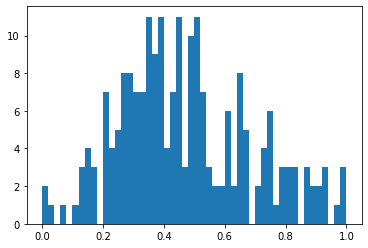

In [109]:
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

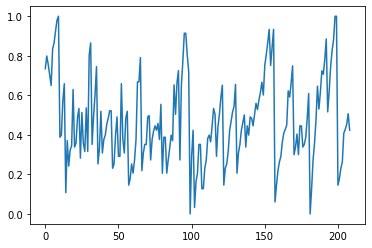

In [110]:
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [111]:
print(data.ndim)

2


In [112]:
# Конвертируем в одномерный массив
data = data.flatten()

In [113]:
# Сохраняем в итоговом наборе данных
dataset['8 столбец'] = data

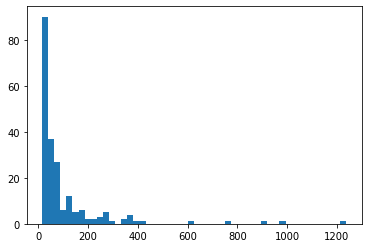

In [114]:
# 9 столбец
data = raw_dataset[9]

matplotlib.pyplot.hist(data , bins = 50)
matplotlib.pyplot.show()

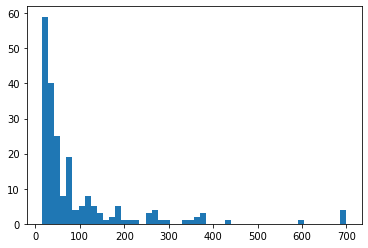

In [115]:
# выброс 700,1250
data = numpy.clip(data,0,700)

matplotlib.pyplot.hist(data,bins=50)
matplotlib.pyplot.show()

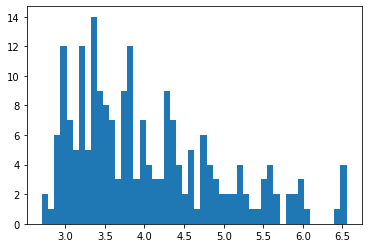

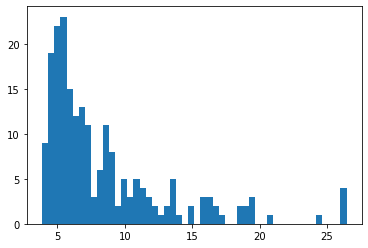

In [116]:
matplotlib.pyplot.hist(numpy.log(data),bins=50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5,bins = 50)
matplotlib.pyplot.show()

In [117]:
data = numpy.log(data)

In [118]:
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

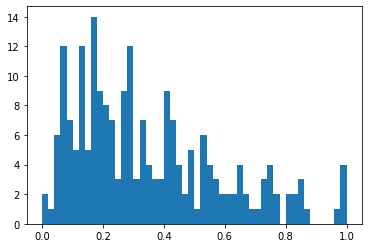

In [119]:
matplotlib.pyplot.hist(data,bins = 50)
matplotlib.pyplot.show()

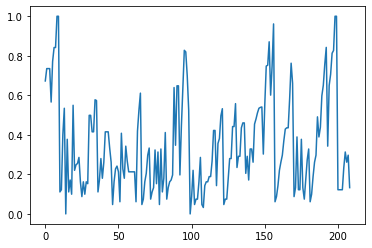

In [120]:
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [121]:
print(data.ndim)

2


In [122]:
data = data.flatten()

In [123]:
dataset['9 столбец'] = data

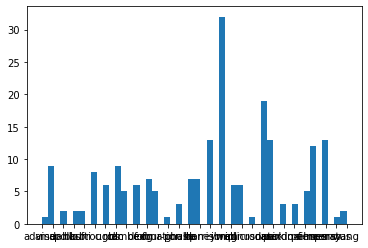

In [124]:
# столбец № 0 
data = raw_dataset[0]

matplotlib.pyplot.hist(data,bins = 50)
matplotlib.pyplot.show()

In [125]:
# проблема № 6
data = pandas.get_dummies(data)

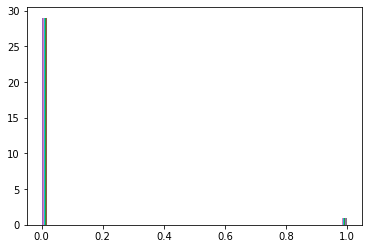

In [126]:
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [127]:
dataset = dataset.join(data)

In [128]:
print(dataset)

         MMIN     CHMAX  2столбец  4 столбец  5 столбец  6 столбец  8 столбец  \
0    0.251074  1.000000  0.478458   0.720253   1.000000   0.800000   0.734665   
1    0.874463  0.676123  0.128082   0.985785   0.433861   0.565685   0.799053   
2    0.874463  0.676123  0.128082   0.985785   0.433861   0.565685   0.756803   
3    0.874463  0.676123  0.128082   0.985785   0.433861   0.565685   0.705087   
4    0.874463  0.478091  0.128082   0.875836   0.433861   0.565685   0.649471   
..        ...       ...       ...        ...        ...        ...        ...   
204  0.497852  0.338062  0.476532   0.765886   0.000000   0.200000   0.408863   
205  0.497852  0.338062  0.420100   0.765886   0.433861   0.282843   0.427977   
206  0.623389  0.447214  0.478458   0.765886   0.000000   0.282843   0.453738   
207  0.376611  0.000000  0.801125   0.765886   0.433861   0.000000   0.506991   
208  0.497852  0.000000  0.801125   0.655936   0.000000   0.000000   0.423359   

     9 столбец  adviser  am

In [71]:
dataset.to_csv('prepared_data.csv')